In [70]:
################### Importing libraries..............###################################
import pyscal as pc
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from matplotlib.ticker import AutoMinorLocator

In [71]:
def getSystem(u):
    """
    input:
        u : MDAnalysis universe object
    output:
        system : Pyscal system object
    """
    
    box = mda.lib.mdamath.triclinic_vectors(u.dimensions)
    positions = u.select_atoms("name OW").positions
    
    co = 0
    atoms = []
    for pos in positions:
        atom = pc.Atom()
        atom.pos = [pos[0], pos[1], pos[2]]
        atom.id = co
        atom.type = 1
        atom.loc = co-1
        atoms.append(atom)
        co += 1

    system = pc.System()
    system.atoms = atoms
    system.box = box
    
    
    return system

In [72]:
################### Helper function ... designed to give you q4 and q6 parameters... But you can modify it 
## to get other higher order parameters.. for e.g. q8, q12 etc...
def getQs(u, averaged = True):
    """
    input:
        u : MDAnalysis universe object
        averaged : Boolean, if True, it will return averaged steinhardt parameters...
    output:
        q4, q6 : q4, q6 parameter of each particles/atoms in the universe object..
    """
    
    system = getSystem(u)
    system.find_neighbors(method='cutoff', cutoff=3.5)
    system.calculate_q([4,6], averaged=averaged)
    systemaq = system.get_qvals([4, 6], averaged=averaged)
    q4 = systemaq[0]
    q6 = systemaq[1]
    
    return q4, q6

In [73]:
############ The universe objects...##########################
################### Give your file locations...............
u11 = mda.Universe("../GenIce_Structures/ice11/ice11.gro")
u0 = mda.Universe("../GenIce_Structures/ice0/ice0.gro")
u2 = mda.Universe("../GenIce_Structures/ice2/ice2.gro")
u3 = mda.Universe("../GenIce_Structures/ice3/ice3.gro")
u4 = mda.Universe("../GenIce_Structures/ice4/ice4.gro")
u5 = mda.Universe("../GenIce_Structures/ice5/ice5.gro")
u6 = mda.Universe("../GenIce_Structures/ice6/ice6.gro")
u7 = mda.Universe("../GenIce_Structures/ice7/ice7.gro")
u9 = mda.Universe("../GenIce_Structures/ice9/ice9.gro")
u1c = mda.Universe("/home/dibya/Dibyendu/PointNet/Sample_Structures/Ice/ice1c.gro")
u1h = mda.Universe("/home/dibya/Dibyendu/PointNet/Sample_Structures/Ice/ice1h.gro")
liquid = mda.Universe("/home/dibya/Dibyendu/PointNet/Sample_Structures/Ice/liquid.gro")

In [74]:
############### Getting steinhardt parameters .. and storing them ...
q4_ice0, q6_ice0 = getQs(u0)
q4_ice11, q6_ice11 = getQs(u11)
q4_ice2, q6_ice2 = getQs(u2)
q4_ice3, q6_ice3 = getQs(u3)
q4_ice4, q6_ice4 = getQs(u4)
q4_ice5, q6_ice5 = getQs(u5)
q4_ice6, q6_ice6 = getQs(u6)
q4_ice7, q6_ice7 = getQs(u7)
q4_ice9, q6_ice9 = getQs(u9)
q4_ice1h, q6_ice1h = getQs(u1h)
q4_ice1c, q6_ice1c = getQs(u1c)
q4_iceliquid, q6_iceliquid = getQs(liquid)

## Plotting ...

In [94]:
plt.style.use("style.txt")

In [95]:
def Ticker(ax):
    """
    Styles the matplotlib axis..
    """
    minor_locator = AutoMinorLocator(2)
    ax.xaxis.set_minor_locator(minor_locator)
    minor_locator = AutoMinorLocator(1)
    ax.yaxis.set_minor_locator(minor_locator)
    return ax

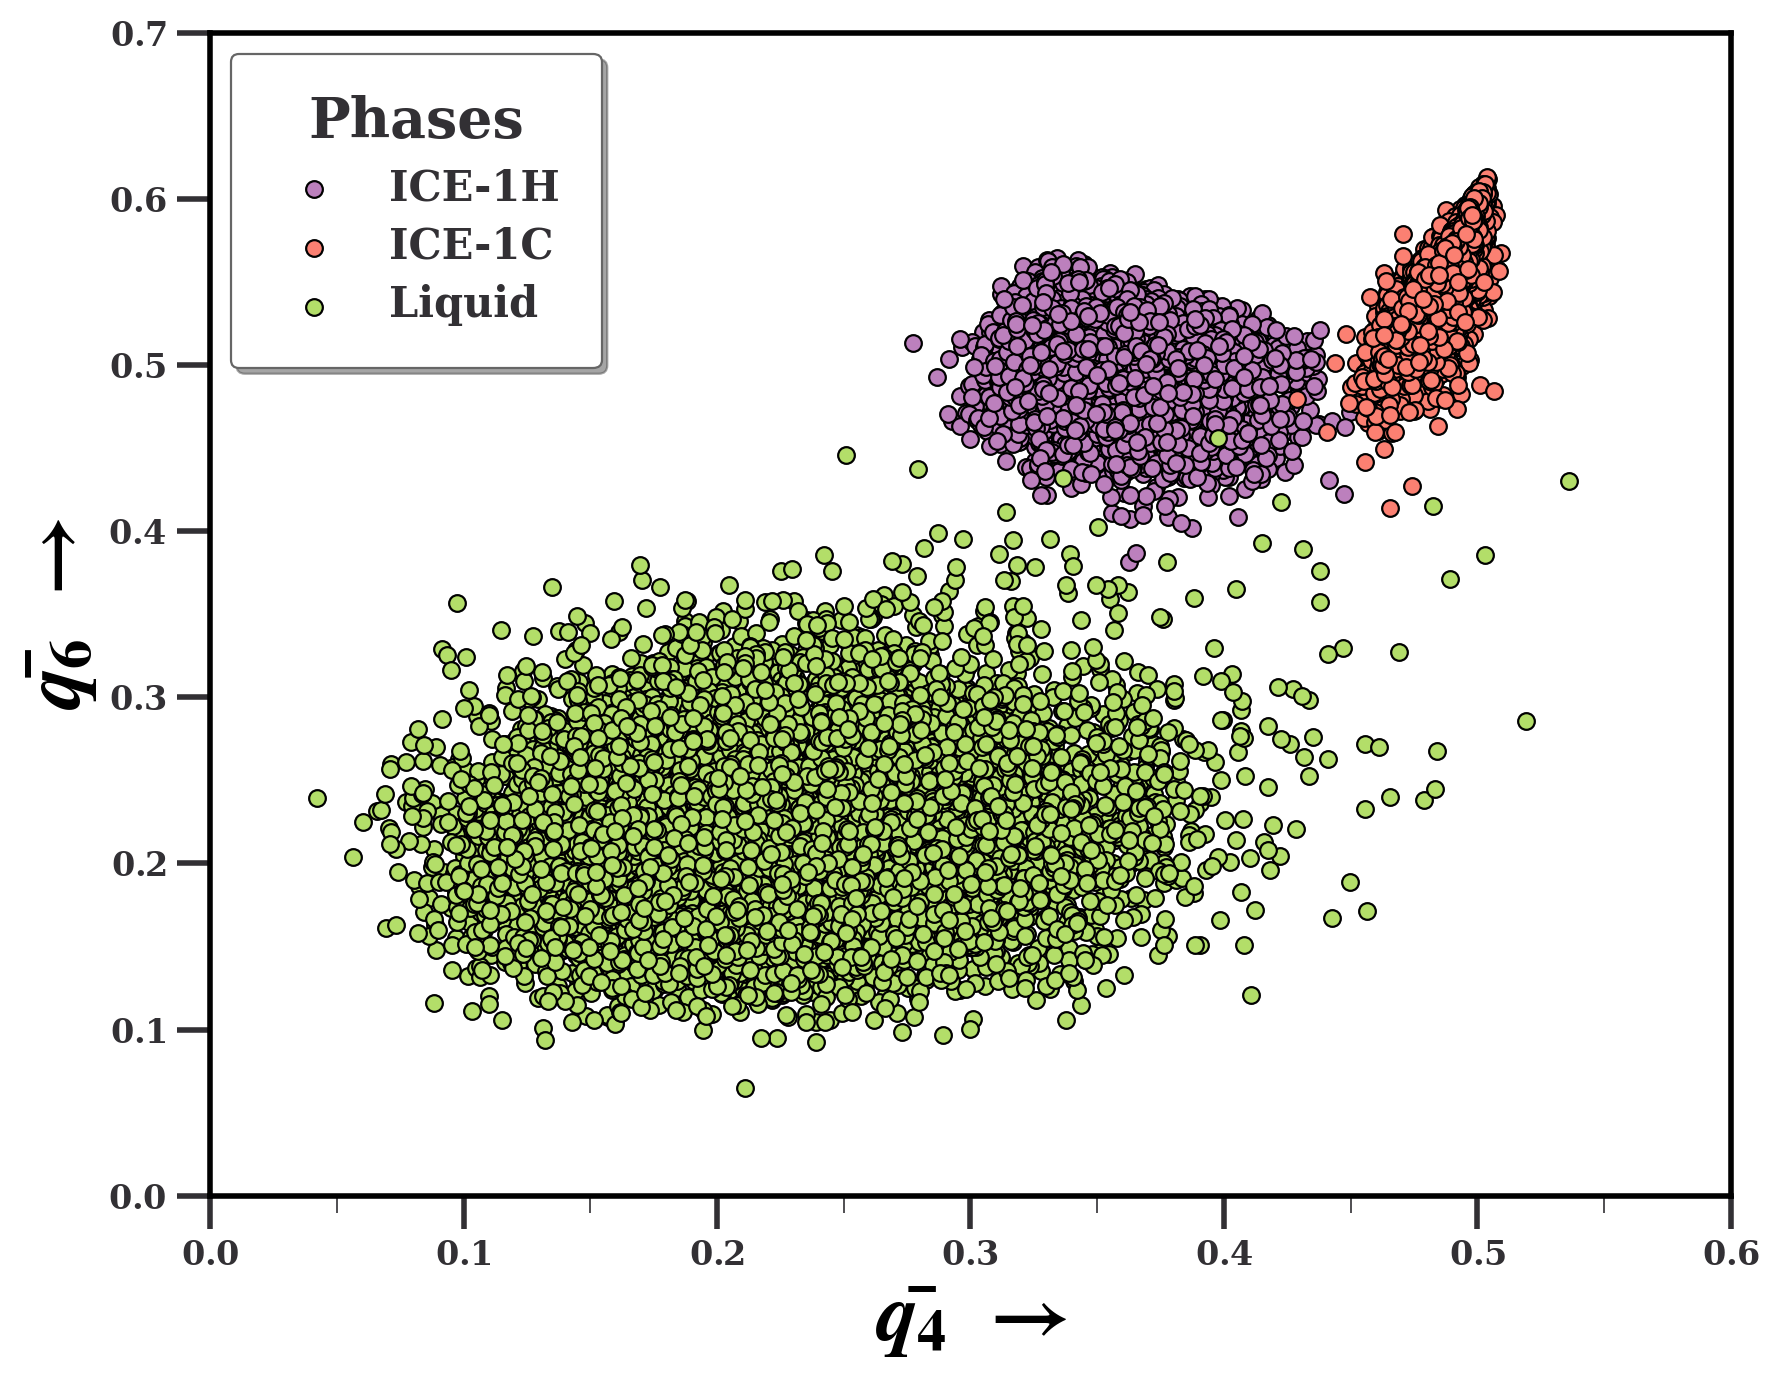

In [99]:
fig, ax = plt.subplots(figsize = [9,7])
ax = Ticker(ax)
#ax.scatter(np.mean(q4_ice2), np.mean(q6_ice2))
#ax.scatter(np.mean(q4_ice3), np.mean(q6_ice3))
#ax.scatter(np.mean(q4_ice4), np.mean(q6_ice4))
#ax.scatter(np.mean(q4_ice5), np.mean(q6_ice5))
#ax.scatter(np.mean(q4_ice6), np.mean(q6_ice6))
#ax.scatter(np.mean(q4_ice7), np.mean(q6_ice7))
#ax.scatter(np.mean(q4_ice9), np.mean(q6_ice9))
#ax.scatter(np.mean(q4_ice11), np.mean(q6_ice11))
ax.scatter(q4_ice1h, q6_ice1h, label = "ICE-1H")
ax.scatter(q4_ice1c, q6_ice1c, label = "ICE-1C")
ax.scatter(q4_iceliquid, q6_iceliquid, label = "Liquid")
ax.legend(loc ="best",title = "Phases",fancybox=True, framealpha=1, shadow=True, borderpad=1,
          title_fontsize = 20, fontsize = 15)
ax.set_xlabel(r"$\bar{q_4}$ $\rightarrow$", fontsize = 30)
ax.set_ylabel(r"$\bar{q_6}$ $\rightarrow$", fontsize = 30)
fig.tight_layout()
######   Uncommenting the below line will save a higher quality version of the image.. resolution can be changed,
######   modifying value of dpi argument .... 
#plt.savefig("file.png", dpi = 800, bbox_inches = 'tight')